<a href="https://colab.research.google.com/github/ashwinigit123/DataMining/blob/main/Assignment1_improved_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


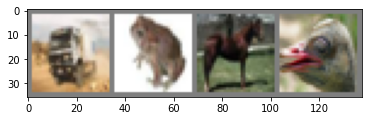

truck  frog horse  bird


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [5]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, 3,1)
        self.conv2 = nn.Conv2d(32, 64, 3,1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(64, 128, 3,1)
        self.conv4 = nn.Conv2d(128, 256, 3,1)
        #self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(5 * 5 * 256, 120)
        self.fc2 = nn.Linear(120, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x)) #320
        x = F.relu(self.conv2(x))#
        x = self.pool(x) #
        x = F.relu(self.conv3(x))
        x = F.relu(self.conv4(x))
        x = self.pool(x)
        x = x.view(-1,5 * 5 * 256)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
net = net.to(device)

In [6]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [7]:
from torch.autograd import Variable
# define the test accuracy function
accuracy_vals=[]
def test_accuracy(net, testset_loader, epoch):
    # Test the model
    net.eval()
    correct = 0
    total = 0
    for data in testset_loader:
        images, labels = data
        images, labels = Variable(images).cuda(), labels.cuda()
        output = net(images)
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()
    accuracy_vals.append(str(100 * correct / total))
    print('Accuracy of the network after epoch '+str(epoch+1)+' is: ' + str(100 * correct / total))

In [8]:
loss_vals=[]
epoch_vals=[]
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)

        # zero the parameter gradients
        optimizer.zero_grad()
      
        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        #if i % 2000 == 1999:    # print every 2000 mini-batches
            #print('[%d, %5d] loss: %.3f' %
                  #(epoch + 1, i + 1, running_loss / 2000))
            #running_loss = 0.0
    print('loss in epoch ' + str(epoch + 1) + ': ' + str(running_loss / len(testloader.dataset)))
    loss_vals.append(str(running_loss / len(testloader.dataset)))
    epoch_vals.append(str(epoch + 1))
    test_accuracy(net, testloader, epoch)
print('Finished Training')

loss in epoch 1: 2.179728798772395
Accuracy of the network after epoch 1 is: tensor(49.5600, device='cuda:0')
loss in epoch 2: 1.4571155706740915
Accuracy of the network after epoch 2 is: tensor(65.6300, device='cuda:0')
loss in epoch 3: 1.079092927242769
Accuracy of the network after epoch 3 is: tensor(71.5500, device='cuda:0')
loss in epoch 4: 0.8527091698559001
Accuracy of the network after epoch 4 is: tensor(73.2800, device='cuda:0')
loss in epoch 5: 0.6823692550139866
Accuracy of the network after epoch 5 is: tensor(75.4400, device='cuda:0')
loss in epoch 6: 0.5382412337964894
Accuracy of the network after epoch 6 is: tensor(76.4800, device='cuda:0')
loss in epoch 7: 0.4253456517157413
Accuracy of the network after epoch 7 is: tensor(76.0900, device='cuda:0')
loss in epoch 8: 0.34066774046043624
Accuracy of the network after epoch 8 is: tensor(75.6300, device='cuda:0')
loss in epoch 9: 0.26616000933209244
Accuracy of the network after epoch 9 is: tensor(75.7100, device='cuda:0')
l

In [9]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

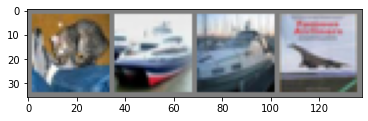

GroundTruth:    cat  ship  ship plane


In [10]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [11]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [12]:
outputs = net(images)

In [13]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    cat  ship   car plane


In [14]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))
avg_acc =  100 * correct / total
print('avg acc:',avg_acc)

Accuracy of the network on the 10000 test images: 75 %
avg acc: 75.54


Accuracy of plane : 83 %
Accuracy of   car : 91 %
Accuracy of  bird : 68 %
Accuracy of   cat : 49 %
Accuracy of  deer : 69 %
Accuracy of   dog : 65 %
Accuracy of  frog : 80 %
Accuracy of horse : 82 %
Accuracy of  ship : 79 %
Accuracy of truck : 85 %


<BarContainer object of 10 artists>

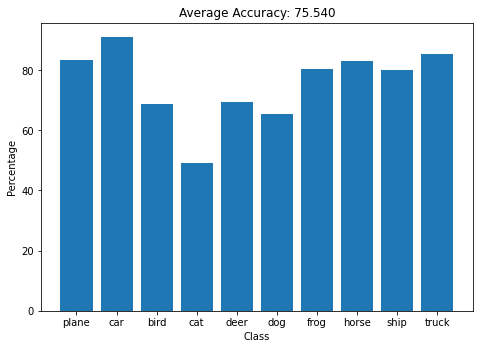

In [15]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

class_vals=[]
perAccuracy=[]
for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))
    class_vals.append(classes[i])
    perAccuracy.append(100 * class_correct[i] / class_total[i])

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.title('Average Accuracy: %1.3f' %avg_acc)
plt.xlabel('Class')
plt.ylabel('Percentage')
ax.bar(class_vals,perAccuracy)